In [24]:
from google.colab import files

uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [25]:
import pandas as pd
file = pd.read_csv('forestfires.csv')
file.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [32]:
X = file.iloc[:,:11]
Y = file.iloc[:,-1]

In [33]:
X.isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
SS = StandardScaler()
LR = LabelEncoder()
selected_columns_ss = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
selected_columns_lr = ['month','day']
X[selected_columns_ss] = SS.fit_transform(X[selected_columns_ss])
for columns in selected_columns_lr:
  X[columns] = LR.fit_transform(X[columns])

Y = LR.fit_transform(Y)
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


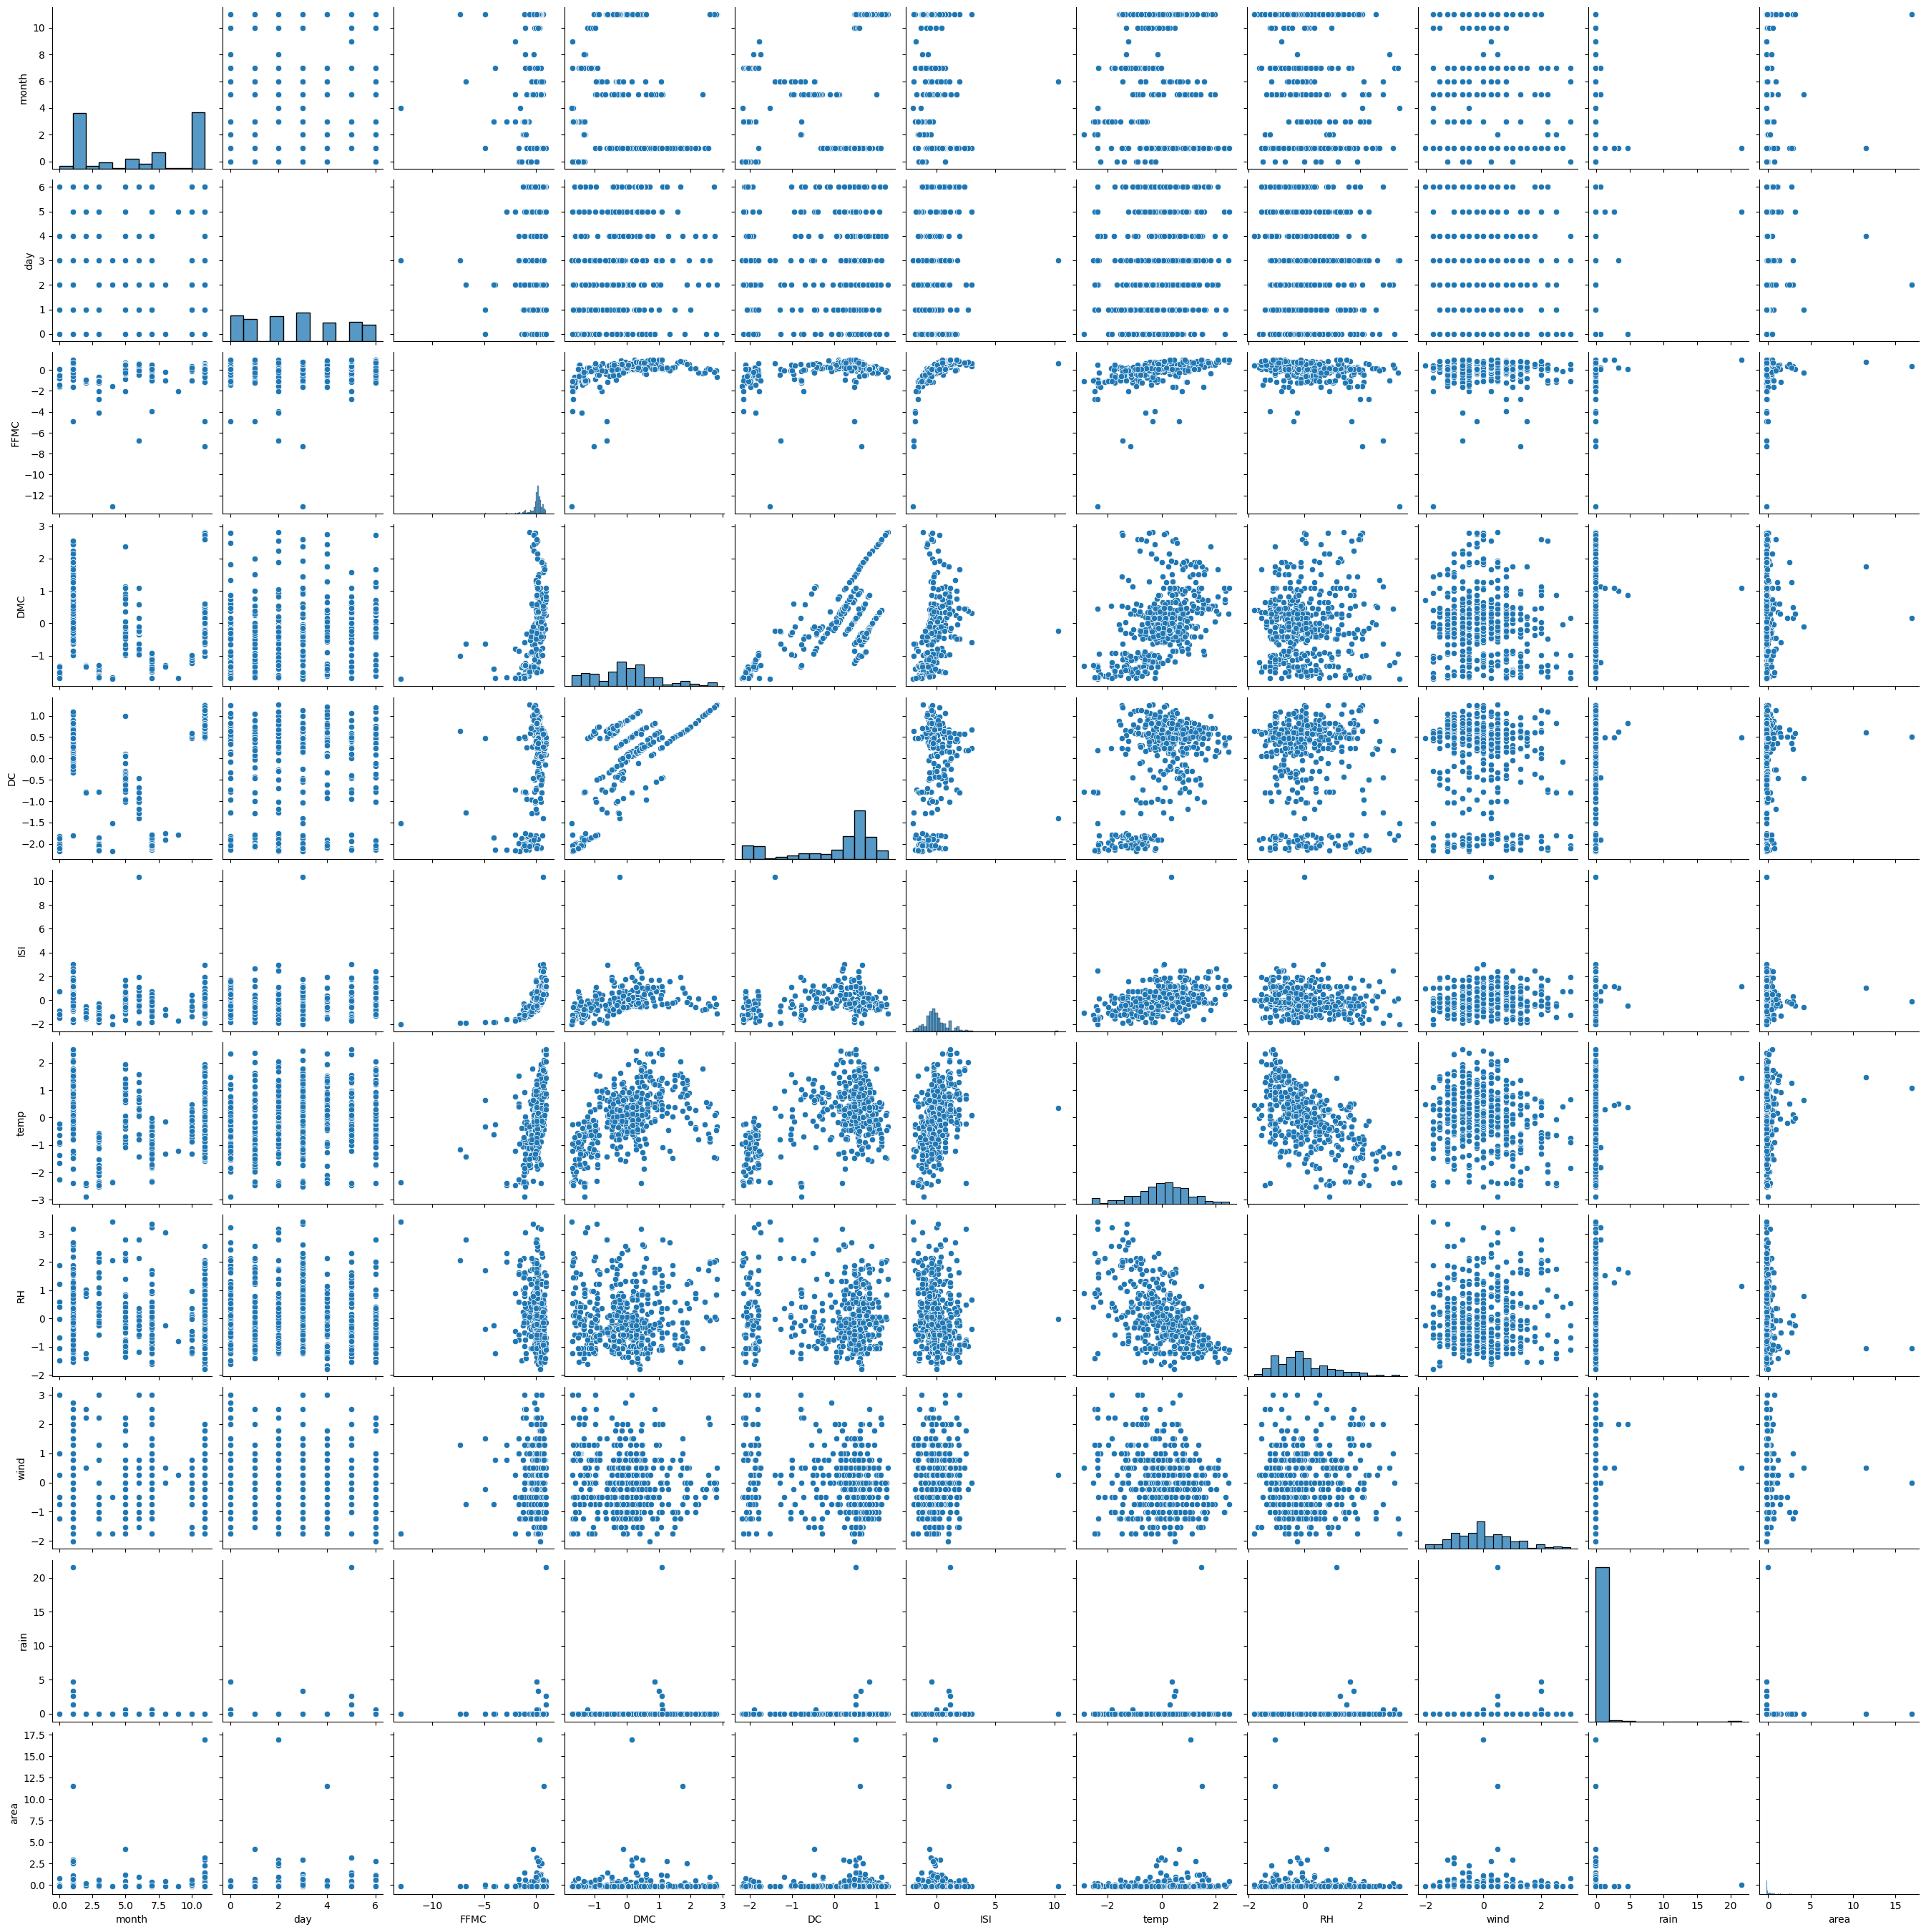

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X)
plt.show()

<ipython-input-37-af4162943ea8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = file.corr()


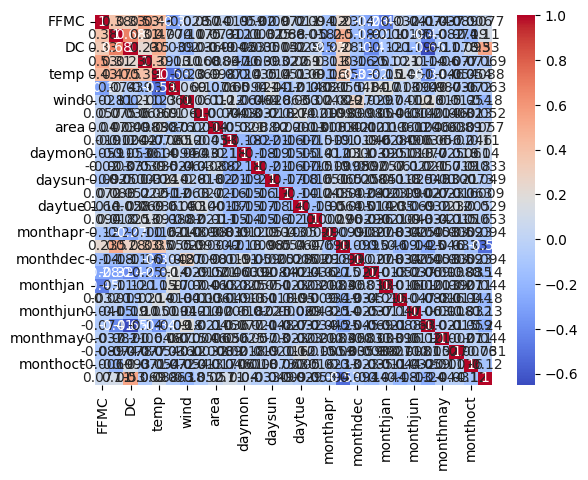

In [37]:
# Calculate correlation matrix
correlation_matrix = file.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

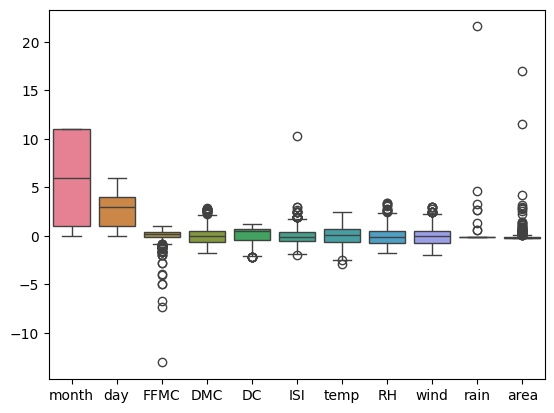

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


In [38]:
import numpy as np

sns.boxplot(data=X)
plt.show()
X.head()

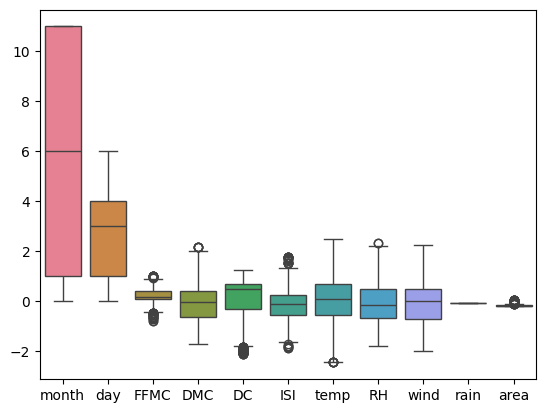

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7.0,0.0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,10.0,5.0,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,10.0,2.0,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,7.0,0.0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,-0.140366,-0.009834,-0.073268,-0.20202
4,7.0,3.0,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,-0.140366,-1.238940,-0.073268,-0.20202


In [39]:
def replace_outliers_with_median(df, columns):
    for column in columns:
        median = df[column].median()  # Compute median from the original DataFrame
        IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
        lower_limit = df[column].quantile(0.25) - 1.5 * IQR
        upper_limit = df[column].quantile(0.75) + 1.5 * IQR
        df[column] = np.where(
            (df[column] < lower_limit) | (df[column] > upper_limit),
            median,  # Use the computed median
            df[column]
        )
    return df

X = replace_outliers_with_median(X, X.columns)
sns.boxplot(data=X)
plt.show()
X.head()

In [40]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge(alpha=2.0)
ridge.fit(X, Y)
print("Ridge coefficients:", ridge.coef_)


lasso = Lasso(alpha=0.02)
lasso.fit(X, Y)
print("Lasso coefficients:", lasso.coef_)

Ridge coefficients: [-5.77147913e-03  2.89770342e-03 -1.07862728e-01 -1.84412725e-02
  7.05347542e-03  3.30780826e-02  1.36754930e-02  2.20238782e-02
 -1.76331254e-02  7.15832635e-31 -2.06470776e+00]
Lasso coefficients: [-0.00225634 -0.         -0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.        ]


In [41]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   features  VIF Factor
0     month    1.478151
1       day    1.059998
2      FFMC    1.776664
3       DMC    2.661071
4        DC    2.250694
5       ISI    1.610871
6      temp    2.380247
7        RH    1.590157
8      wind    1.096848
9      rain   16.588114
10     area    1.013280


In [42]:
X = X.drop('rain', axis=1)
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,7.0,0.0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.20202
1,10.0,5.0,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.20202
2,10.0,2.0,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.20202
3,7.0,0.0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,-0.140366,-0.009834,-0.20202
4,7.0,3.0,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,-0.140366,-1.238940,-0.20202


In [43]:
#Linear
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
from sklearn.svm import SVC
df = SVC(kernel='linear',C=1.0)
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)


accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for train data:", accuracy_train)
print("Accuracy score for test data:", accuracy_test)


Accuracy score for train data: 0.7506925207756233
Accuracy score for test data: 0.8012820512820513


In [45]:
#poly
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
from sklearn.svm import SVC
df = SVC(kernel='poly',degree = 2 )
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)


accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for train data:", accuracy_train)
print("Accuracy score for test data:", accuracy_test)

Accuracy score for train data: 0.7368421052631579
Accuracy score for test data: 0.717948717948718


In [46]:
#rbf
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
from sklearn.svm import SVC
df = SVC(kernel='rbf',gamma= 2 )
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)


accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for train data:", accuracy_train)
print("Accuracy score for test data:", accuracy_test)

Accuracy score for train data: 0.9390581717451524
Accuracy score for test data: 0.6794871794871795
